In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [8]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),      # resize to model input
    transforms.ToTensor(),            # [H,W,C] → [C,H,W], values [0,1]
    transforms.Normalize((0.5,), (0.5,))  # normalize to [-1,1] for stability
])

In [9]:
from Data_Loader import SnapshotDataset
from torch.utils.data import DataLoader
dataset = SnapshotDataset("./Animation No Legend", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([32, 3, 128, 128])


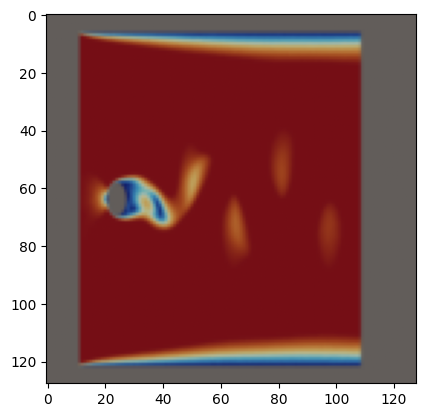

In [10]:
images = next(iter(dataloader))   # shape: [batch, C, H, W]
print(images.shape)

img = images[1]
img = img*0.5 + 0.5

img_np = img.permute(1, 2, 0).cpu().numpy()
plt.imshow(img_np)
plt.show()

In [11]:
#"Looks Good"

In [12]:
from AutoEncoder import CAE
model = CAE()

In [15]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)

epochs = 20
outputs = []
model.train()
for epoch in range(epochs):
    total_loss = 0
    for img in dataloader:
        optimizer.zero_grad()
        recon = model(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*img.size(0)

    avg_loss = total_loss / len(dataset)
    if epoch % 2 == 0:
        print(f"Epoch: [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}")

Epoch: [1/20], Loss: 0.767347
Epoch: [3/20], Loss: 0.372746
Epoch: [5/20], Loss: 0.325138
Epoch: [7/20], Loss: 0.319611
Epoch: [9/20], Loss: 0.319130
Epoch: [11/20], Loss: 0.318805
Epoch: [13/20], Loss: 0.318811
Epoch: [15/20], Loss: 0.318832
Epoch: [17/20], Loss: 0.318858
Epoch: [19/20], Loss: 0.318886
